# Etude des corrélations entre les données en vent à différents endroits

### Chargement des packages et choix des options

In [1]:
#importation des packages

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import random

In [2]:
#Choix des options

#Lien pour les données
#data_path=""
#data_path="Données/"
data_path="../Données/"

### Récupération des données

In [3]:
from utility_tools import regroupement_data

data_hToulouse_wind,data_dToulouse_wind=regroupement_data(data_path+'Data_Toulouse/Wind_power_default/',1980,2022)
data_hAgen_wind,data_dAgen_wind=regroupement_data(data_path+'Data_Agen/Wind_power_default/',1980,2022)
data_hMontpellier_wind,data_dMontpellier_wind=regroupement_data(data_path+'Data_Montpellier/Wind_power_default/',1980,2022)
data_hPerpignan_wind,data_dPerpignan_wind=regroupement_data(data_path+'Data_Perpignan/Wind_power_default/',1980,2022)
data_hBordeaux_wind,data_dBordeaux_wind=regroupement_data(data_path+'Data_Bordeaux/Wind_power_default/',1980,2022)

Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes
Toutes les données sont différentes


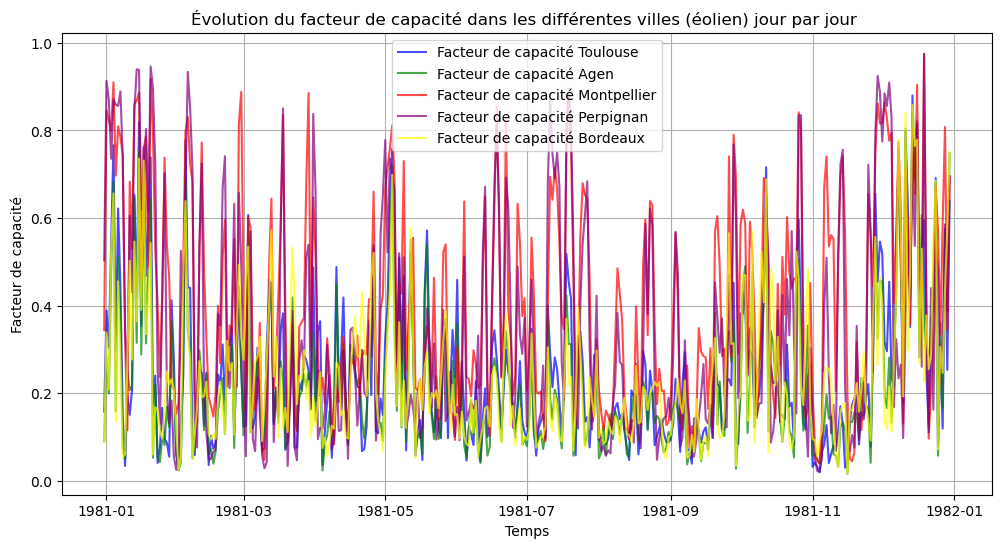

In [4]:
# Affichage des données dans les différentes villes sur 1 an pour voir "à l'oeil" les écarts
plt.figure(figsize=(12, 6))
plt.plot(data_dToulouse_wind.index[365:730], data_dToulouse_wind['electricity'][365:730], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(data_dAgen_wind.index[365:730], data_dAgen_wind['electricity'][365:730], label='Facteur de capacité Agen', color='green', alpha=0.7)
plt.plot(data_dMontpellier_wind.index[365:730], data_dMontpellier_wind['electricity'][365:730], label='Facteur de capacité Montpellier', color='red', alpha=0.7)
plt.plot(data_dPerpignan_wind.index[365:730], data_dPerpignan_wind['electricity'][365:730], label='Facteur de capacité Perpignan', color='purple', alpha=0.7)
plt.plot(data_dBordeaux_wind.index[365:730], data_dBordeaux_wind['electricity'][365:730], label='Facteur de capacité Bordeaux', color='yellow', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

Hypothèse : Agen et Toulouse et Bordeaux ont l'air assez corrélés, Montpellier et Perpignan assez corrélés aussi. On voit quand même pas grand chose.

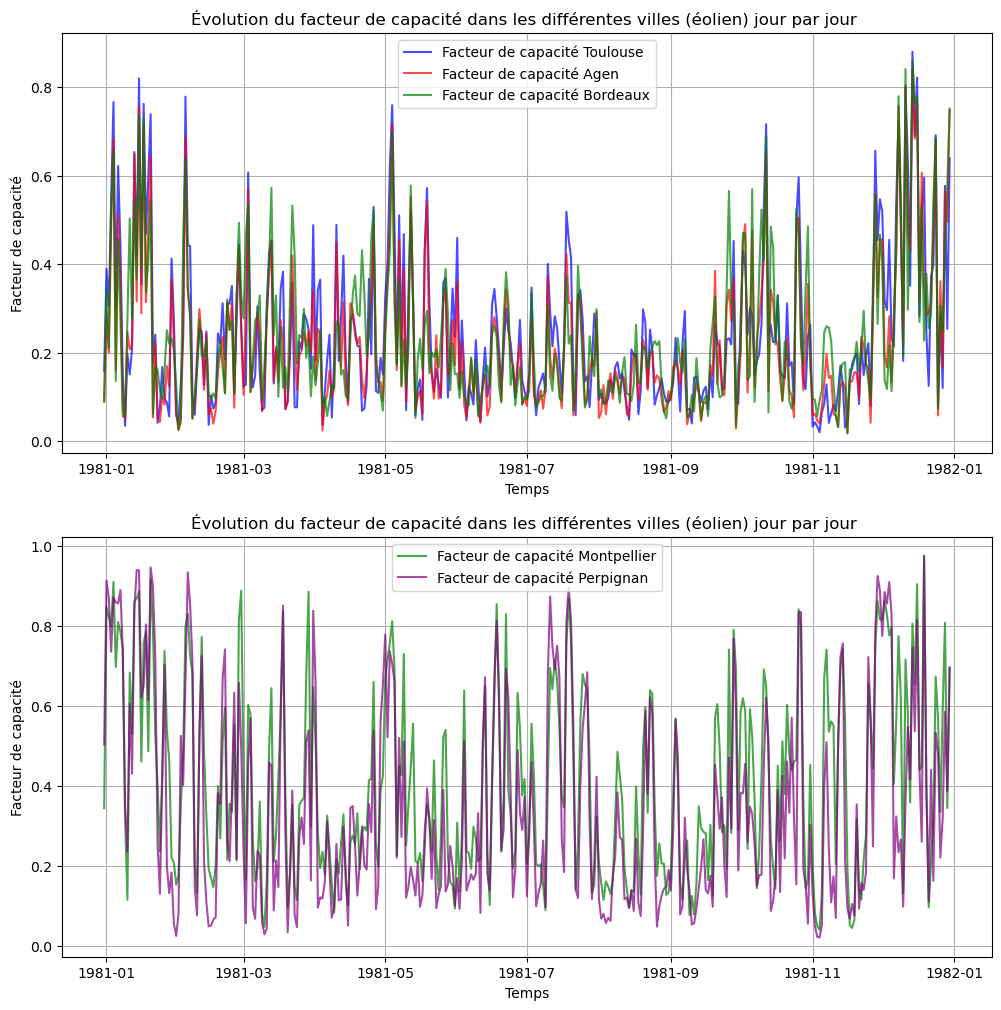

In [5]:
# Affichage des données dans les différentes villes sur 1 an pour voir "à l'oeil" les écarts
plt.figure(figsize=(12, 12))
plt.subplot(211)
plt.plot(data_dToulouse_wind.index[365:730], data_dToulouse_wind['electricity'][365:730], label='Facteur de capacité Toulouse', color='blue', alpha=0.7)
plt.plot(data_dAgen_wind.index[365:730], data_dAgen_wind['electricity'][365:730], label='Facteur de capacité Agen', color='red', alpha=0.7)
plt.plot(data_dBordeaux_wind.index[365:730], data_dBordeaux_wind['electricity'][365:730], label='Facteur de capacité Bordeaux', color='green', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)

plt.subplot(212)
plt.plot(data_dMontpellier_wind.index[365:730], data_dMontpellier_wind['electricity'][365:730], label='Facteur de capacité Montpellier', color='green', alpha=0.7)
plt.plot(data_dPerpignan_wind.index[365:730], data_dPerpignan_wind['electricity'][365:730], label='Facteur de capacité Perpignan', color='purple', alpha=0.7)
plt.title('Évolution du facteur de capacité dans les différentes villes (éolien) jour par jour ')
plt.xlabel('Temps')
plt.ylabel('Facteur de capacité')
plt.legend()
plt.grid(True)
plt.show()

Pas très lisible, on va essayer maintenant de faire une étude des corrélations.

## Etude des corrélations

In [66]:
#On créer le dataframe data1
data_all = pd.concat([data_dToulouse_wind['electricity'],data_dAgen_wind['electricity'],data_dBordeaux_wind['electricity'],data_dMontpellier_wind['electricity'],data_dPerpignan_wind['electricity']],axis=1)
#On utilise .shift sur les donénes de loading_pca car les données démarrent à 0, alors que data1 démarre à 1.
data_all.columns=["Toulouse","Agen","Bordeaux","Montpellier","Perpignan"]
print(data_all.head())

#On construit une matrice de corrélation avec des valeurs d'abord

cormat_all = data_all.corr()
round(cormat_all,2)


            Toulouse      Agen  Bordeaux  Montpellier  Perpignan
time                                                            
1980-01-01  0.274292  0.212792  0.261042     0.135125   0.204667
1980-01-02  0.334875  0.255958  0.186958     0.647583   0.724042
1980-01-03  0.023708  0.073208  0.142375     0.372750   0.334917
1980-01-04  0.063042  0.175958  0.274042     0.114458   0.087708
1980-01-05  0.434917  0.388792  0.367083     0.426458   0.508708


,Toulouse,Agen,Bordeaux,Montpellier,Perpignan
Toulouse,1.00,0.91,0.67,0.56,0.55
Agen,0.91,1.00,0.87,0.45,0.37
Bordeaux,0.67,0.87,1.00,0.36,0.23
Montpellier,0.56,0.45,0.36,1.00,0.87
Perpignan,0.55,0.37,0.23,0.87,1.00


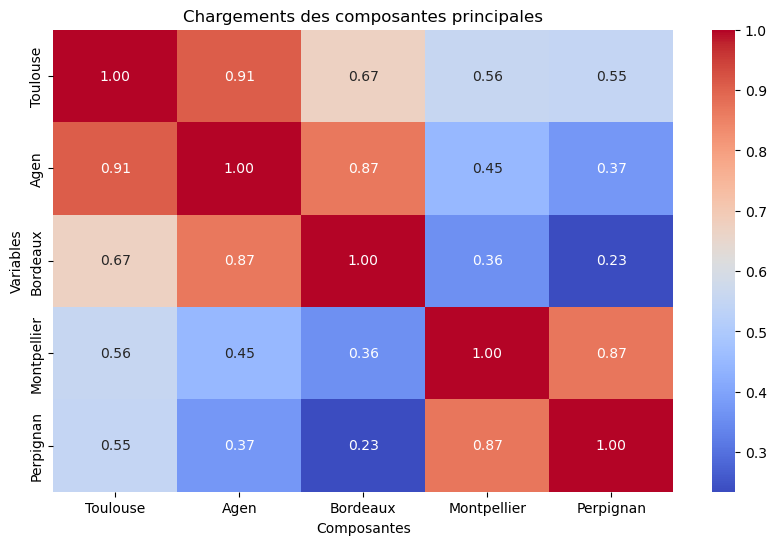

In [67]:
# Représentation du tableau sous forme de matrice
plt.figure(figsize=(10, 6))
sns.heatmap(cormat_all, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Chargements des composantes principales')
plt.xlabel('Composantes')
plt.ylabel('Variables')
plt.show()

On observe que les corrélations sont très variables : d'une part on a certaines villes qui sont très corrélés entre elles : Agen et Toulouse, Agen et Bordeaux, et Montpellier et Perpignan. D'autre part, on observe que des villes un peu plus éloignés sont très peu corrélés : seulement 0.23 de corrélations entre Bordeaux et Perpignan par exemple. Ces informations sont importantes pour la suite.

## Décomposition entre tendance, saisonnalité et résidu et études des différences 

### Etude des tendances

On a émit l'hypothèse précédemment que la tendance était constante égale à une certaine valeur à Toulouse. On va désormais essayer de voir si cette tendance est la même dans les autres villes observés ou non.

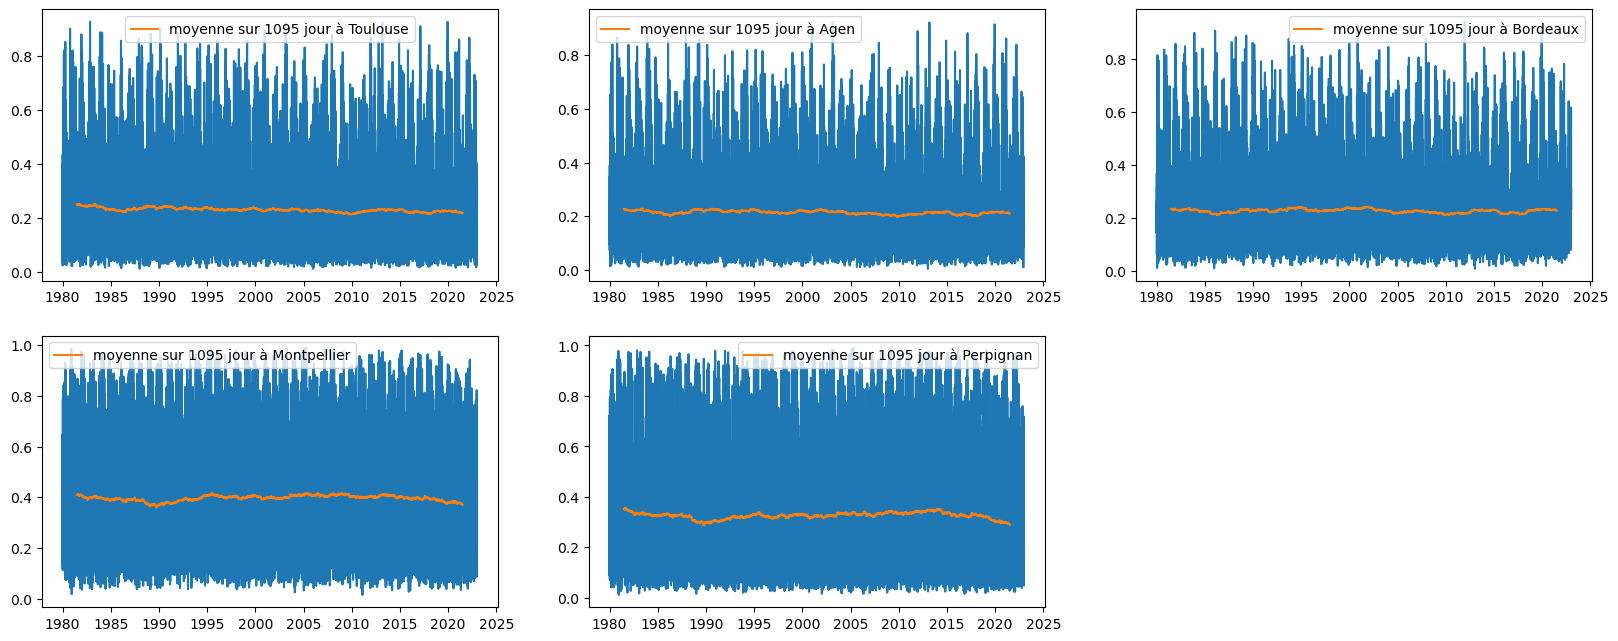

In [8]:
win = 1095 # fenêtre d'observation (en nombre de jours)
villes=["Toulouse","Agen","Bordeaux","Montpellier","Perpignan"]
data_day_wind={'Toulouse':data_dToulouse_wind,'Agen':data_dAgen_wind,'Bordeaux':data_dBordeaux_wind,'Montpellier':data_dMontpellier_wind,'Perpignan':data_dPerpignan_wind}
fig = plt.figure(figsize=(20,12))

def moy_glissante(data,win,subplot,name):  #Je peut utiliser un dictionnaire pour remplacer "data"
    ax = fig.add_subplot(3, 3, subplot)
    ax.plot(data['electricity'])
    ax.plot(data['electricity'].rolling(win, center=True).mean(), label=f"moyenne sur {win} jour à {name}")
    ax.legend()
    
moy_glissante(data_dToulouse_wind,win,1,villes[0])
moy_glissante(data_dAgen_wind,win,2,villes[1])
moy_glissante(data_dBordeaux_wind,win,3,villes[2])
moy_glissante(data_dMontpellier_wind,win,4,villes[3])
moy_glissante(data_dPerpignan_wind,win,5,villes[4])

On peut à nouveau supposer que les tendances sont constantes au cours du temps. On va dons récupérer les valeurs moyennes qui serviront de tendance pour la suite.

In [9]:
tendances = {}

tendances["Toulouse"]=data_dToulouse_wind['electricity'].mean()
tendances["Agen"]=data_dAgen_wind['electricity'].mean()
tendances["Bordeaux"]=data_dBordeaux_wind['electricity'].mean()
tendances["Montpellier"]=data_dMontpellier_wind['electricity'].mean()
tendances["Perpignan"]=data_dPerpignan_wind['electricity'].mean()

print(tendances)

{'Toulouse': 0.22975704879239356, 'Agen': 0.21467268878135745, 'Bordeaux': 0.22604735982002633, 'Montpellier': 0.39625870951653297, 'Perpignan': 0.32570107230782297}


### Etude des saisonnalités

On applique la même méthode qu'à Toulouse pour obtenir des informations sur la saisonnalité. L'idée est de savoir si les saisonnalités sont comparable entre les différentes villes ou non

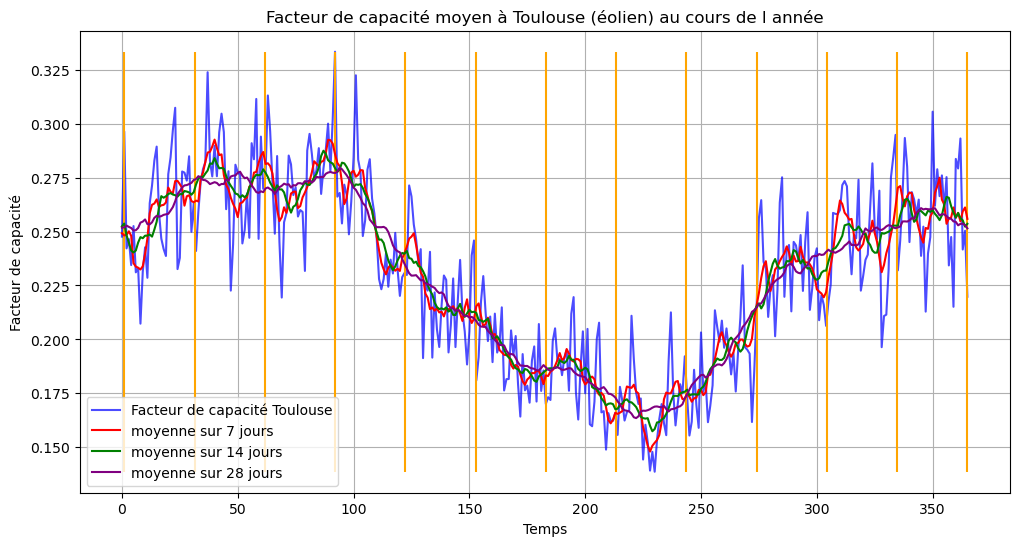

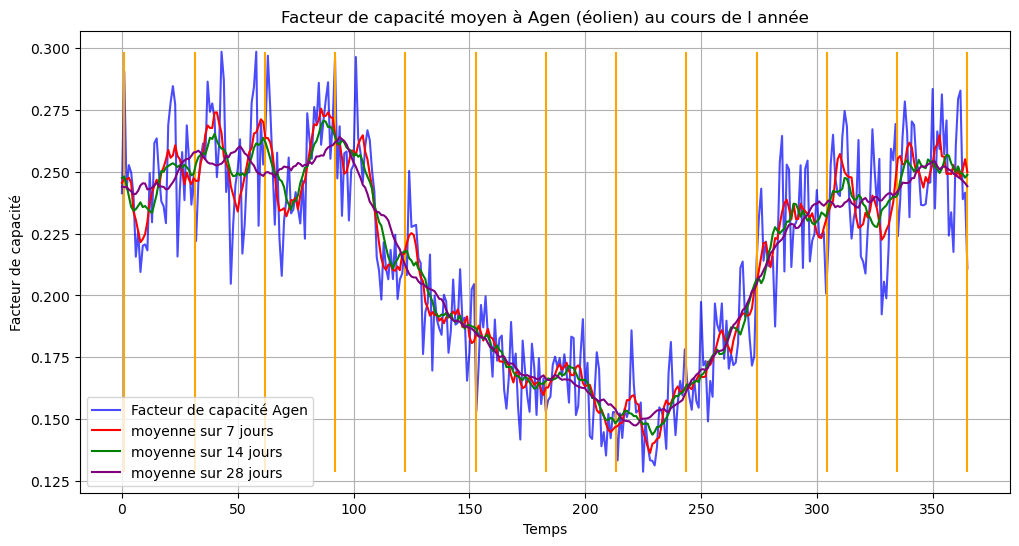

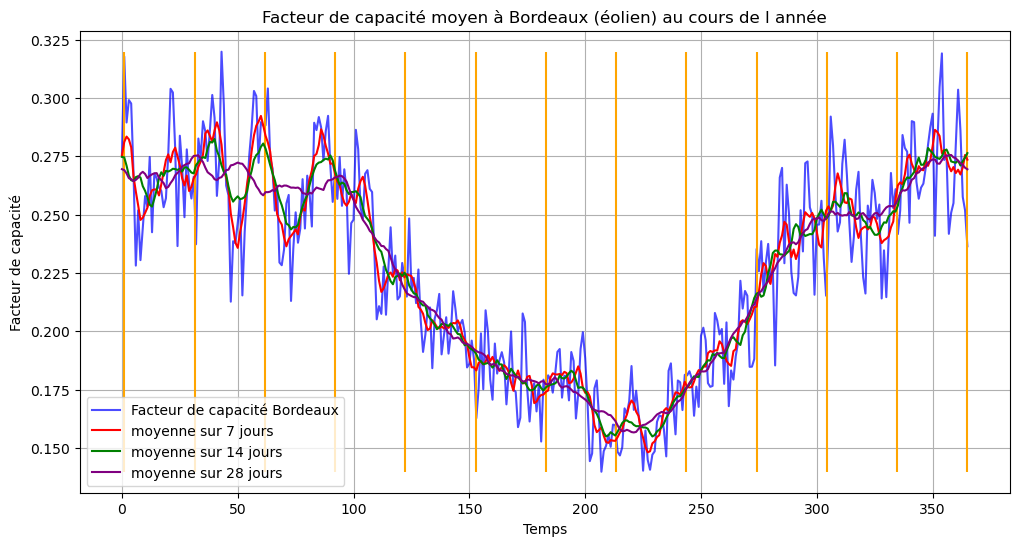

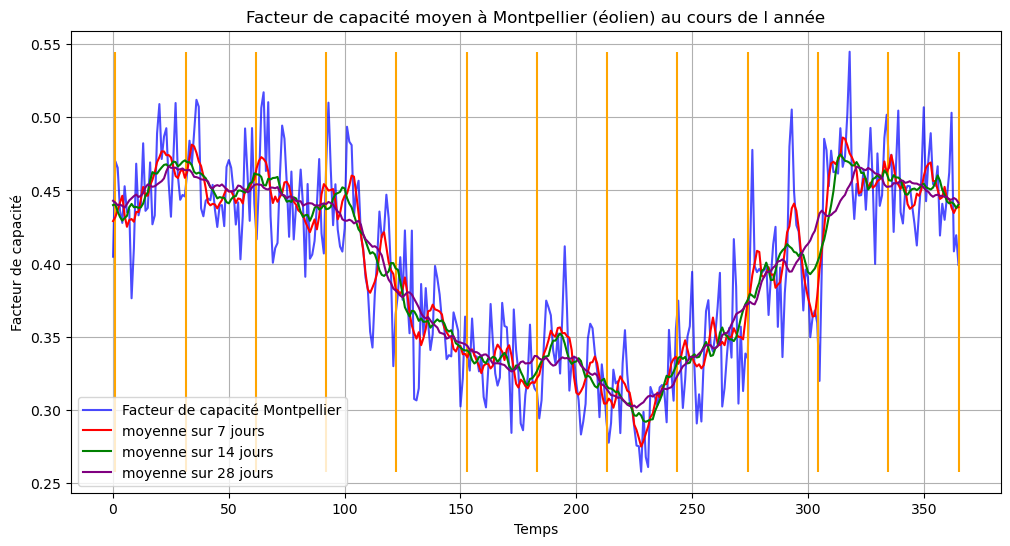

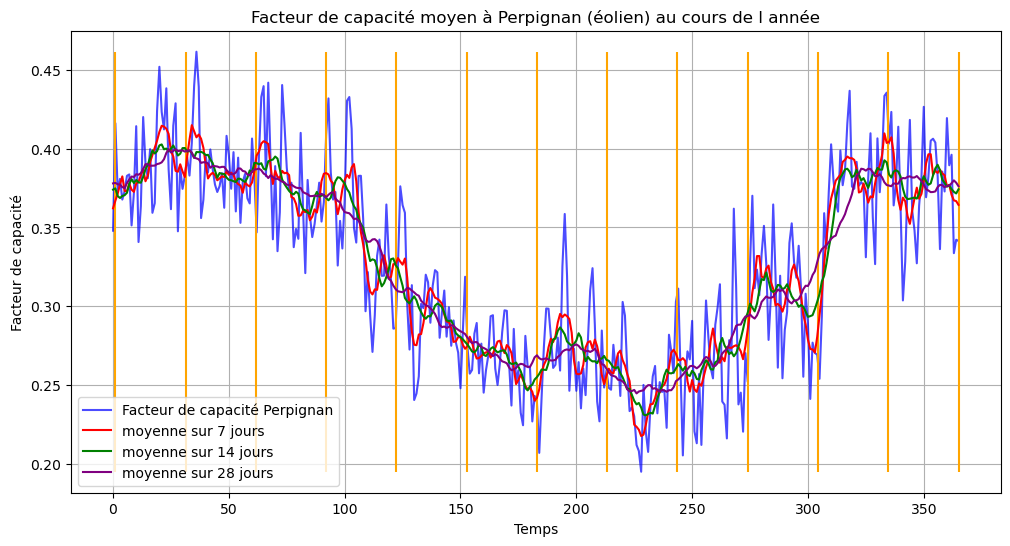

In [10]:
#Affichage de la saisonnalité de chaque ville sur des graphs différents

def Saisonnalite(ville):
    data_copy=data_day_wind[ville].copy()
    
    data_copy['day']=data_copy.index.day
    data_copy['month']=data_copy.index.month
    data_year_wind_tendance = data_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

    # Création du graphique de série temporelle pour la capacité nationale
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label=f"Facteur de capacité {ville}", color='blue', alpha=0.7)
    plt.title(f'Facteur de capacité moyen à {ville} (éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)

    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")

    # print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
    # print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

    #On ajoute une "moyenne" en lissant
    #On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année

    plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=f"moyenne sur 7 jours", color = "red")
    plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=f"moyenne sur 14 jours", color = "green")
    plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=f"moyenne sur 28 jours", color = "purple")
    plt.legend()

    saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]
    plt.show()
    
Saisonnalite(villes[0])
Saisonnalite(villes[1])
Saisonnalite(villes[2])
Saisonnalite(villes[3])
Saisonnalite(villes[4])

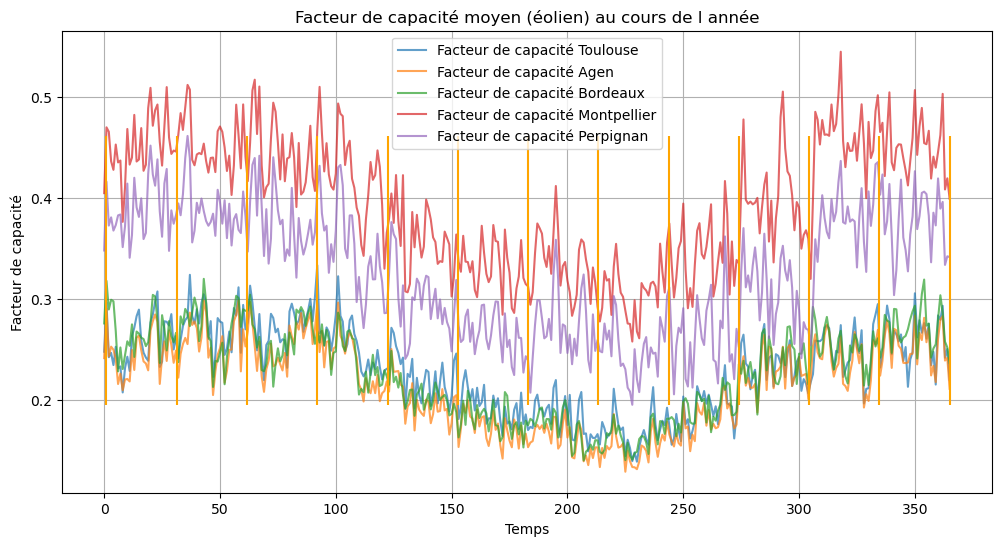

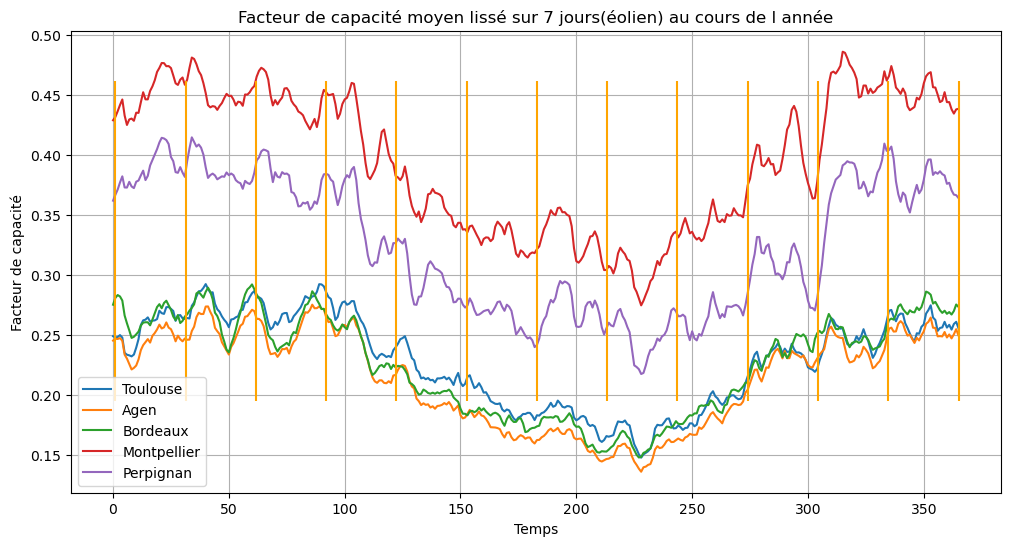

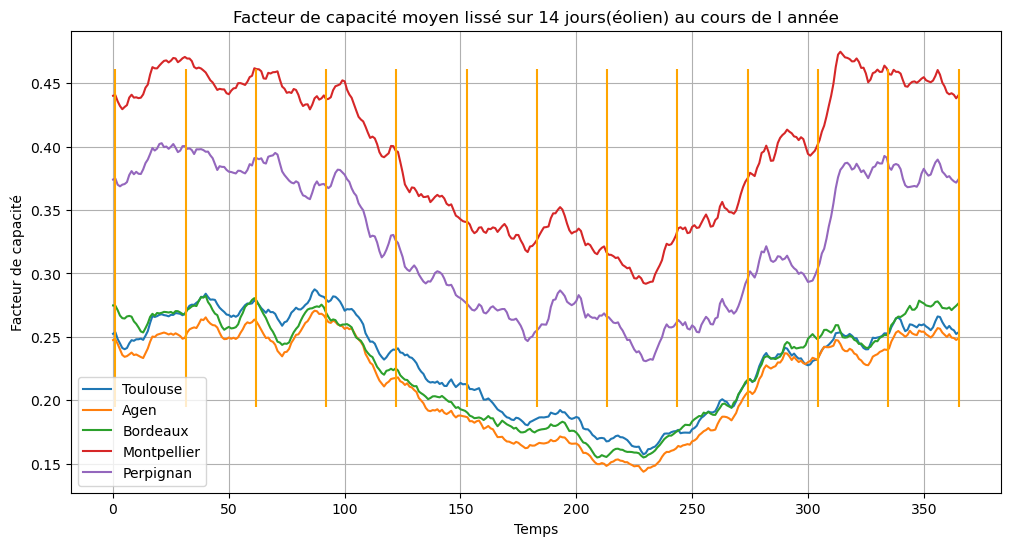

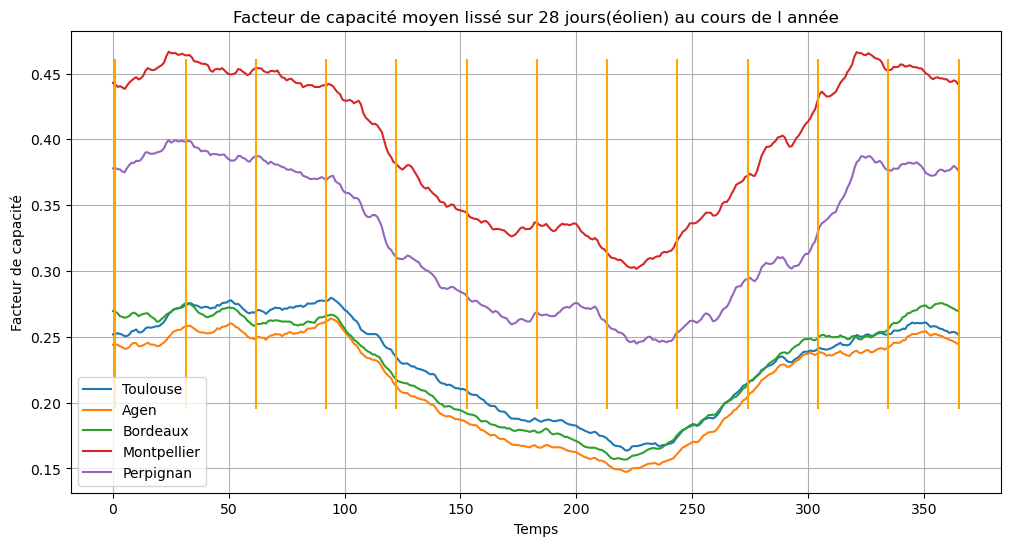

In [11]:
#Affichage de la saisonnalité des différentes villes sur un même graph

def Saisonnalite(villes):
    for ville in villes:
        data_copy=data_day_wind[ville].copy()
        data_copy['day']=data_copy.index.day
        data_copy['month']=data_copy.index.month

        data_year_wind_tendance = data_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

        # Création du graphique de série temporelle pour la capacité nationale
        plt.figure(1,figsize=(12, 6))
        plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label=f"Facteur de capacité {ville}", alpha=0.7)
        


    # print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
    # print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

    #On ajoute une "moyenne" en lissant
    #On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année
        plt.figure(2,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=ville)
        plt.figure(3,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=ville)
        plt.figure(4,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=ville)

    #saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]
    plt.figure(1)
    plt.title(f'Facteur de capacité moyen (éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(2)
    plt.title(f'Facteur de capacité moyen lissé sur 7 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(3)
    plt.title(f'Facteur de capacité moyen lissé sur 14 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(4)
    plt.title(f'Facteur de capacité moyen lissé sur 28 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    plt.show()
    
Saisonnalite(villes)

On remarque que la forme des différentes courbes est très proche, et que même si la tendance est différente, les courbes se reseemblent beaucoup, avec des "pics" aux mêmes endroits. On va maintenant afficher les mêmes courbes sans la tendance.

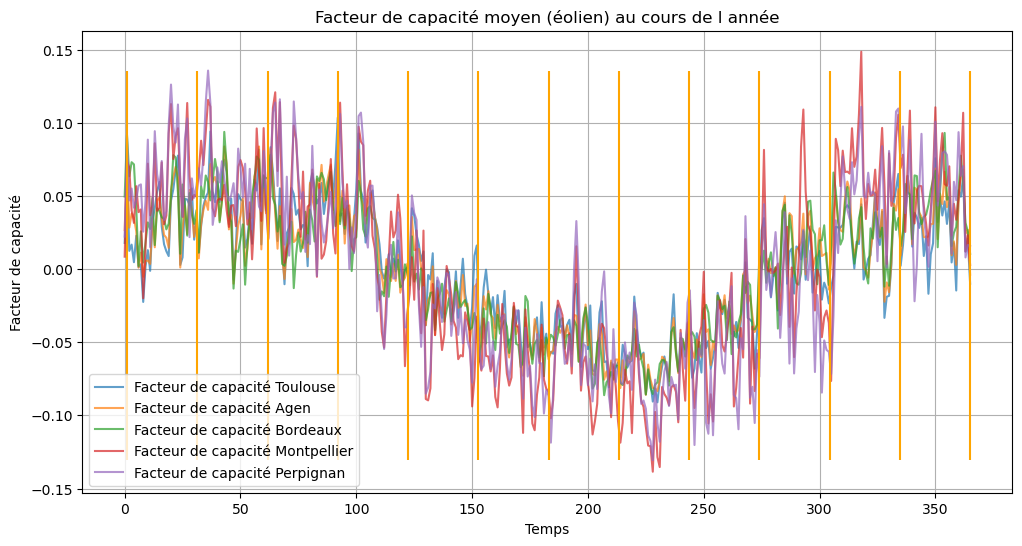

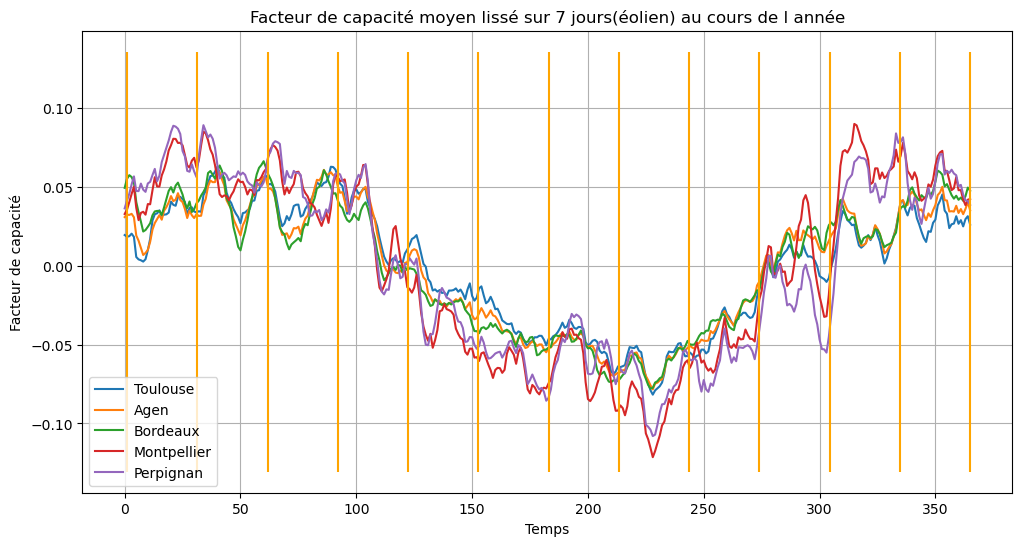

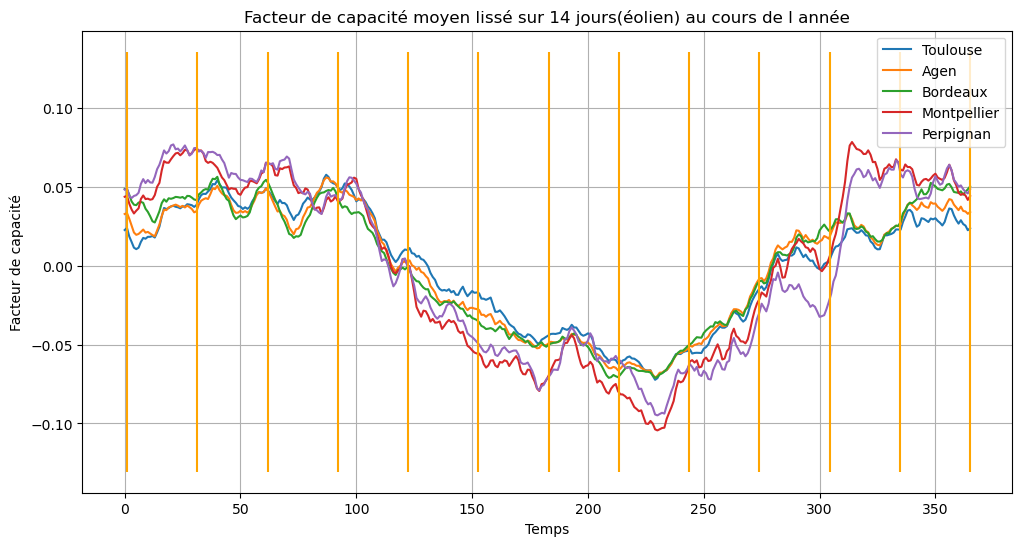

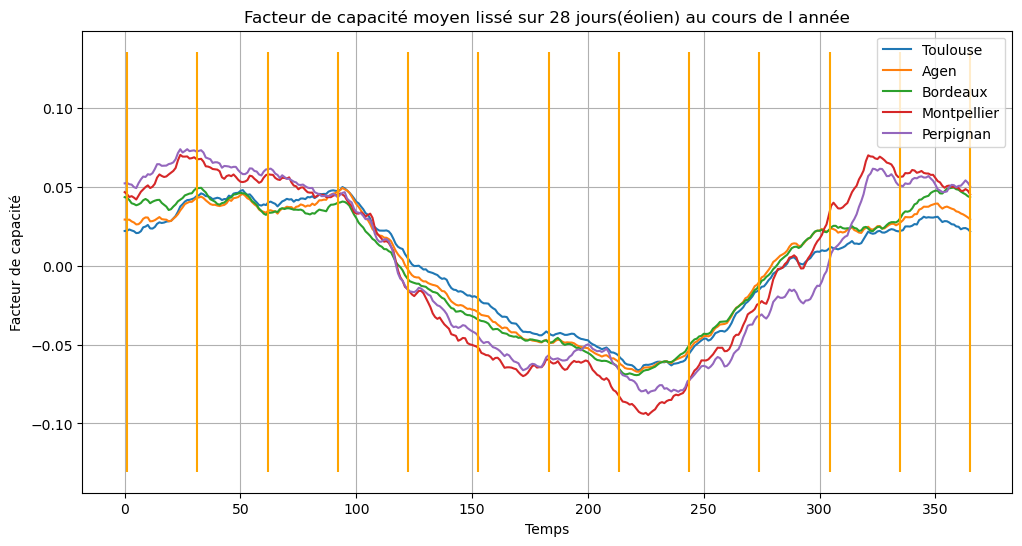

In [12]:
#Affichage de la saisonnalité des différentes villes sur un même graph
#On créer également un dictionnaire avec la "saisonnalité" pour chaque ville
saisonnalite28={}

def Saisonnalite_minus_tendance(villes):
    for ville in villes:
        data_copy=data_day_wind[ville].copy()-tendances[ville]
        data_copy['day']=data_copy.index.day
        data_copy['month']=data_copy.index.month

        data_year_wind_tendance = data_copy.groupby(['month', 'day']).agg({'electricity': 'mean', 'wind_speed': 'mean'})

        # Création du graphique de série temporelle pour la capacité nationale
        plt.figure(1,figsize=(12, 6))
        plt.plot(np.arange(366),data_year_wind_tendance['electricity'], label=f"Facteur de capacité {ville}", alpha=0.7)
        


    # print(pd.concat([data_year_wind_tendance['electricity'][360:],data_year_wind_tendance['electricity']])[:20])
    # print(data_year_wind_tendance['electricity'].rolling(7, center=True).mean().to_numpy()[:20][7:])

    #On ajoute une "moyenne" en lissant
    #On ajoute également des données avant et après pour avoir une moyenne lissée sur toute l'année
        plt.figure(2,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][359:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:7]]).rolling(7, center=True).mean().to_numpy()[7:373], label=ville)
        plt.figure(3,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][352:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:14]]).rolling(14, center=True).mean().to_numpy()[14:380], label=ville)
        plt.figure(4,figsize=(12, 6))
        plt.plot(pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394], label=ville)

        saisonnalite28[ville]=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]
        
    #saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]
    plt.figure(1)
    plt.title(f'Facteur de capacité moyen (éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(2)
    plt.title(f'Facteur de capacité moyen lissé sur 7 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(3)
    plt.title(f'Facteur de capacité moyen lissé sur 14 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    
    plt.figure(4)
    plt.title(f'Facteur de capacité moyen lissé sur 28 jours(éolien) au cours de l année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_year_wind_tendance['electricity'].min(), ymax = data_year_wind_tendance['electricity'].max(), colors = "orange")
    plt.show()
    
Saisonnalite_minus_tendance(villes)

On observe une saisonnalité assez proche pour les différentes villes, avec peut-être deux groupes, et un gros lien au niveau des "pics" de facteur de capacité moyens sur certaines dates.

### Résidus

On va maintenant calculer les résidus dans chaque ville, et essayer de voir si ces résidus sont corrélés ou non

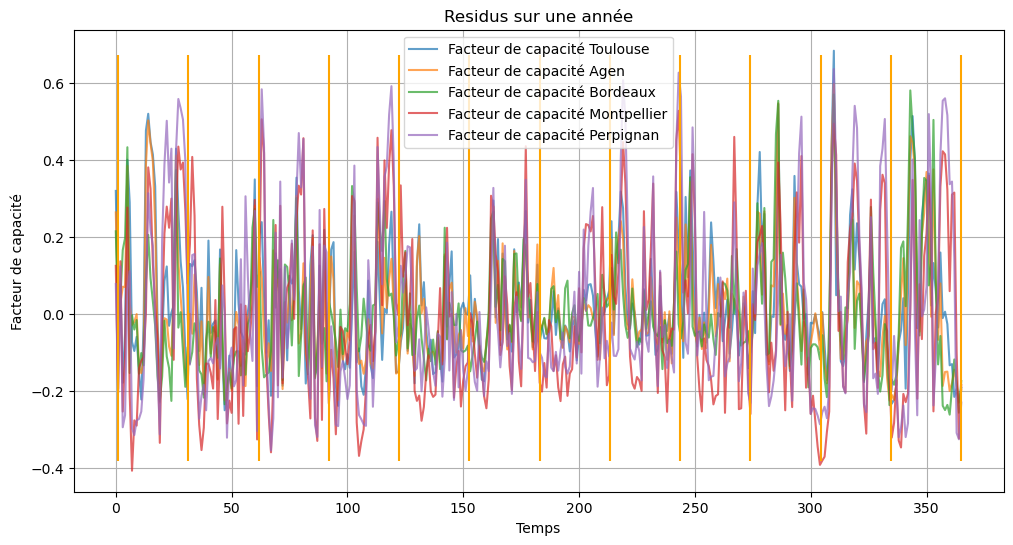

In [54]:
residus28={}

def residus(villes):
    for ville in villes:
        data_copy=data_day_wind[ville].copy()-tendances[ville]
        
        #Soustraction de la saisonnalité
        bissextile=4
        count=0
        while count < len(data_copy):
            for i in range(int(365+0.25*bissextile)):
                if bissextile == 4:
                    #print(data_copy['electricity'].iloc[count])
                    data_copy.iloc[count]-=saisonnalite28[ville][i]
                else:
                    data_copy.iloc[count]-=np.concatenate((saisonnalite28[ville][:59],saisonnalite28[ville][60:]))[i]  
                    
                count+=1
            if bissextile == 4:
                bissextile = bissextile-3
            else:
                bissextile+=1
            
                    #Si bissextile : normal, sinon : supprimer le 29 février
                    
            

        # Création du graphique de série temporelle pour la capacité nationale
        plt.figure(1,figsize=(12, 6))
        plt.plot(np.arange(366),data_copy['electricity'][731:1097], label=f"Facteur de capacité {ville}", alpha=0.7)
        
        residus28[ville]=data_copy
        
    #saison28=pd.concat([data_year_wind_tendance['electricity'][338:],data_year_wind_tendance['electricity'],data_year_wind_tendance['electricity'][:28]]).rolling(28, center=True).mean().to_numpy()[28:394]
    plt.title(f'Residus sur une année')
    plt.xlabel('Temps')
    plt.ylabel('Facteur de capacité')
    plt.grid(True)
    plt.legend()
    time_tick  = np.linspace(1, 365, 13)
    plt.vlines(x = time_tick, ymin = data_copy['electricity'].min(), ymax = data_copy['electricity'].max(), colors = "orange")
    plt.show()
    
residus(villes)

In [63]:
#On fait maintenant une étude des corrélations sur les rédisus

list(residus28.items())[0][1]['electricity']

#On créer le dataframe data_residus
data_residus = pd.concat([list(residus28.items())[0][1]['electricity'],list(residus28.items())[1][1]['electricity'],list(residus28.items())[2][1]['electricity'],list(residus28.items())[3][1]['electricity'],list(residus28.items())[4][1]['electricity']],axis=1)
#On utilise .shift sur les donénes de loading_pca car les données démarrent à 0, alors que data1 démarre à 1.
data_residus.columns=["Toulouse","Agen","Bordeaux","Montpellier","Perpignan"]
print(data_residus.head())

#On construit une matrice de corrélation avec des valeurs d'abord

cormat_residus = data_residus.corr()
round(cormat_residus,2)

            Toulouse      Agen  Bordeaux  Montpellier  Perpignan
time                                                            
1980-01-01  0.022491 -0.031153 -0.008483    -0.307811  -0.173269
1980-01-02  0.082931  0.012182 -0.082158     0.205895   0.345800
1980-01-03 -0.229056 -0.170721 -0.125347    -0.067113  -0.042475
1980-01-04 -0.189108 -0.066825  0.008376    -0.325935  -0.289447
1980-01-05  0.183264  0.146687  0.101891    -0.012995   0.133143


,Toulouse,Agen,Bordeaux,Montpellier,Perpignan
Toulouse,1.00,0.91,0.65,0.53,0.53
Agen,0.91,1.00,0.86,0.41,0.34
Bordeaux,0.65,0.86,1.00,0.31,0.19
Montpellier,0.53,0.41,0.31,1.00,0.86
Perpignan,0.53,0.34,0.19,0.86,1.00


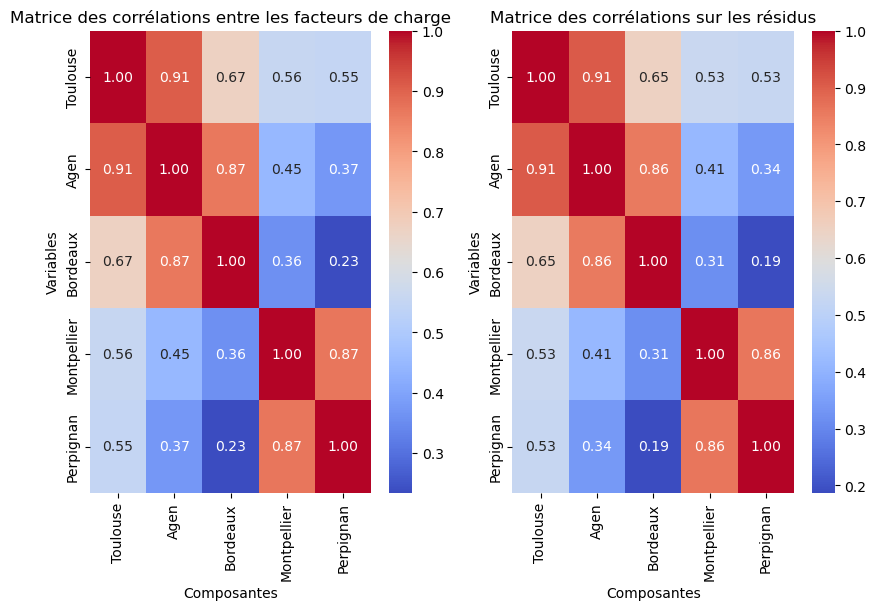

In [68]:
# Représentation du tableau sous forme de matrice
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.heatmap(cormat_all, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matrice des corrélations entre les facteurs de charge')
plt.xlabel('Composantes')
plt.ylabel('Variables')

plt.subplot(1,2,2)
sns.heatmap(cormat_residus, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Matrice des corrélations sur les résidus')
plt.xlabel('Composantes')
plt.ylabel('Variables')
plt.show()